    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

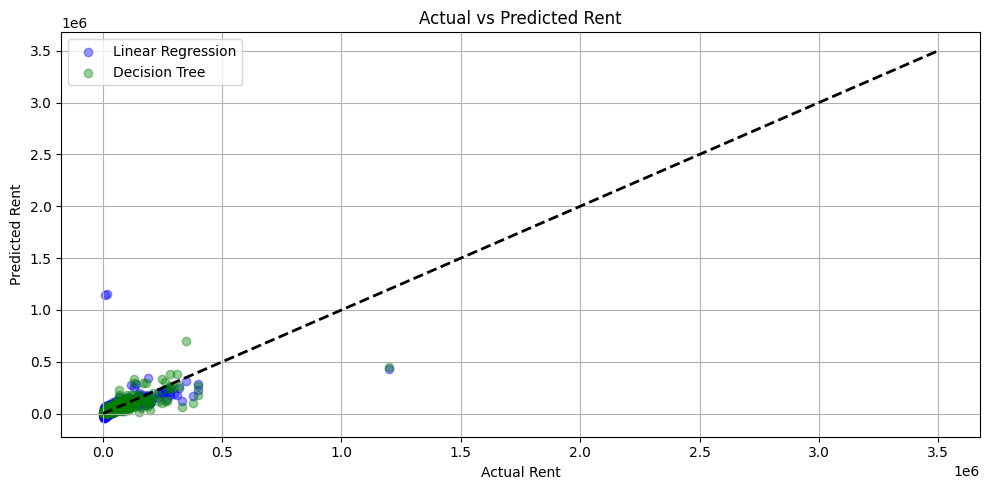

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv(r'C:\Users\User\Downloads\archive\House_Rent_Dataset.csv')

# Display basic info
print(df.head())

# Drop irrelevant columns
df.drop(['Posted On', 'Floor', 'Tenant Preferred', 'Point of Contact'], axis=1, inplace=True)

# Features and target
X = df.drop('Rent', axis=1)
y = df['Rent']

# Identify categorical and numerical features
categorical_features = ['Area Type', 'City', 'Furnishing Status', 'Area Locality']
numeric_features = ['BHK', 'Bathroom', 'Size']

# Preprocessing: One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # keep numeric features as is
)

# Pipelines for both models
linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=10, random_state=42))
])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
linear_pipeline.fit(X_train, y_train)
tree_pipeline.fit(X_train, y_train)

# Predict
linear_preds = linear_pipeline.predict(X_test)
tree_preds = tree_pipeline.predict(X_test)

# Evaluate using RMSE (manual square root to avoid 'squared' argument issue)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_preds))
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_preds))

print("Linear Regression RMSE:", linear_rmse)
print("Decision Tree RMSE:", tree_rmse)

# Plot predictions vs actual
plt.figure(figsize=(10, 5))
plt.scatter(y_test, linear_preds, color='blue', alpha=0.4, label='Linear Regression')
plt.scatter(y_test, tree_preds, color='green', alpha=0.4, label='Decision Tree')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
